In [1]:
import psycopg2


In [2]:
conn = psycopg2.connect(
    database="postgres",
    host="localhost",
    user="postgres",
    password="password",
    port=5432,
)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT * FROM city")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'A Corua (La Corua)', 87, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(2, 'Abha', 82, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(3, 'Abu Dhabi', 101, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(4, 'Acua', 60, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(5, 'Adana', 97, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(6, 'Addis Abeba', 31, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(7, 'Aden', 107, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(8, 'Adoni', 44, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(9, 'Ahmadnagar', 44, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(10, 'Akishima', 50, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))
(11, 'Akron', 103, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=d

In [5]:
import pandas as pd

In [6]:
data = pd.DataFrame(rows)
data.columns = ["city_id","city","country_id","last_update"]
print(data["country_id"].value_counts())
data.info()

country_id
44     60
23     53
103    35
50     31
60     30
       ..
109     1
42      1
58      1
57      1
83      1
Name: count, Length: 109, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   city_id      600 non-null    int64              
 1   city         600 non-null    object             
 2   country_id   600 non-null    int64              
 3   last_update  600 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 18.9+ KB


In [7]:
cursor.execute("SELECT * FROM city WHERE city_id = %s", (44,))
rows = cursor.fetchall()

In [8]:
print(rows)

[(44, 'Bag', 15, datetime.datetime(2022, 2, 15, 9, 45, 25, tzinfo=datetime.timezone.utc))]


In [9]:
cursor.execute("SELECT * FROM customer")
rows = cursor.fetchall()
customer = pd.DataFrame(rows)
customer.columns = ["customer_id", "store_id", "first_name", "last_name","email","address_id","activebool","create_date","last_update","active"]
customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2022-02-14,2022-02-15 09:57:20+00:00,1
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2022-02-14,2022-02-15 09:57:20+00:00,1
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2022-02-14,2022-02-15 09:57:20+00:00,1
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2022-02-14,2022-02-15 09:57:20+00:00,1
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2022-02-14,2022-02-15 09:57:20+00:00,1


In [10]:
cursor.execute("SELECT * FROM inventory")
rows = cursor.fetchall()
inventory =  pd.DataFrame(rows)
inventory.columns=["inventory_id","film_id","store_id","last_update"]
inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2022-02-15 10:09:17+00:00
1,2,1,1,2022-02-15 10:09:17+00:00
2,3,1,1,2022-02-15 10:09:17+00:00
3,4,1,1,2022-02-15 10:09:17+00:00
4,5,1,2,2022-02-15 10:09:17+00:00


,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00


599
16049


<Axes: xlabel='Number_rentals', ylabel='Total_Paid'>

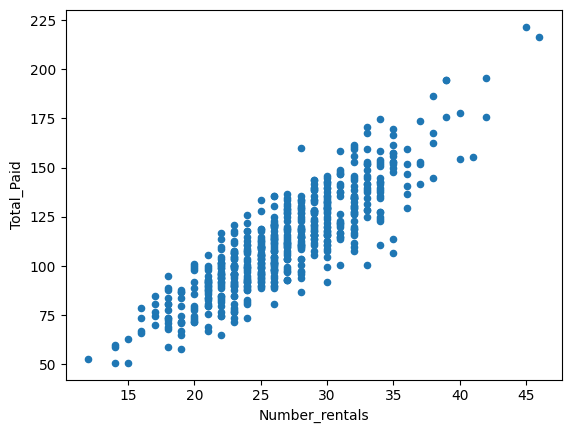

In [11]:
import matplotlib.pyplot as plt

cursor.execute("SELECT * FROM payment")
rows = cursor.fetchall()
payment = pd.DataFrame(rows)
payment.columns = [
    "payment_id",
    "customer_id",
    "staff_id",
    "rental_id",
    "amount",
    "payment_date",
]
display(payment.head())
num_customers = payment["customer_id"].nunique()
print(num_customers)
print(len(payment))
cust_pays = payment[["customer_id", "rental_id", "amount"]]
cust_pays = cust_pays.sort_values(by="customer_id")
cust_pays = pd.DataFrame(
    cust_pays.groupby("customer_id")[["rental_id", "amount"]].agg(["count", "sum"])
)
cust_pays.drop(columns=[("rental_id", "sum"), ("amount", "count")], inplace=True)
cust_pays = cust_pays.reset_index(level="customer_id")
cust_pays.columns = ["Customer_ID","Number_rentals", "Total_Paid"]
cust_pays.sort_values("Total_Paid", ascending=False)
cust_pays.plot.scatter(x="Number_rentals",y="Total_Paid")

<class 'pandas.core.frame.DataFrame'>


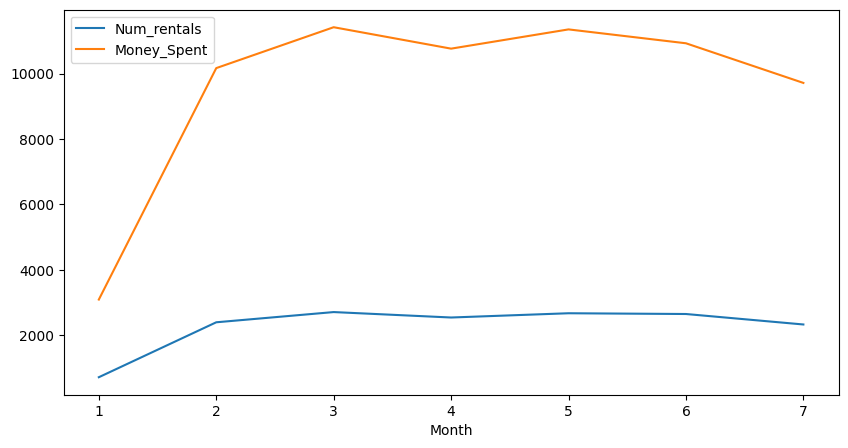

In [12]:
rental_by_date = pd.DataFrame(
    payment.groupby(payment["payment_date"].dt.month)[["rental_id", "amount"]].agg(
        ["count", "sum"]
    )
)
rental_by_date.drop(columns=[("rental_id", "sum"), ("amount", "count")], inplace=True)
rental_by_date = rental_by_date.reset_index()
rental_by_date.columns = ["Month", "Num_rentals", "Money_Spent"]
rental_by_date["Money_Spent"] = pd.to_numeric(rental_by_date["Money_Spent"])
print(type(rental_by_date))
rental_by_date.plot(x="Month", y=["Num_rentals", "Money_Spent"], figsize=(10, 5))
# rental_by_date.plot(x="Month", y=["Money_Spent"], figsize=(10, 5))
plt.show()

In [13]:
cursor.execute("SELECT * FROM rental")
rows = cursor.fetchall()
rental = pd.DataFrame(rows)
rental.columns = [
    "rental_id",
    "rental_date",
    "inventory_id",
    "customer_id",
    "return_date",
    "staff_id",
    "last_update"
]
rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2022-05-24 21:54:33+00:00,1525,459,2022-05-28 18:40:33+00:00,1,2022-02-16 02:30:53+00:00
1,3,2022-05-24 22:03:39+00:00,1711,408,2022-06-01 21:12:39+00:00,1,2022-02-16 02:30:53+00:00
2,4,2022-05-24 22:04:41+00:00,2452,333,2022-06-03 00:43:41+00:00,2,2022-02-16 02:30:53+00:00
3,5,2022-05-24 22:05:21+00:00,2079,222,2022-06-02 03:33:21+00:00,1,2022-02-16 02:30:53+00:00
4,6,2022-05-24 22:08:07+00:00,2792,549,2022-05-27 00:32:07+00:00,1,2022-02-16 02:30:53+00:00


In [14]:
cursor.execute("SELECT * FROM film_category")
rows = cursor.fetchall()
film_category = pd.DataFrame(rows)
film_category.columns = [
    "film_id",
    "category_date",
    "last_update",
]
film_category.head()

,film_id,category_date,last_update
0,1,6,2022-02-15 10:07:09+00:00
1,2,11,2022-02-15 10:07:09+00:00
2,3,6,2022-02-15 10:07:09+00:00
3,4,11,2022-02-15 10:07:09+00:00
4,5,8,2022-02-15 10:07:09+00:00


In [21]:
cursor.execute("SELECT * FROM category")
rows = cursor.fetchall()
category = pd.DataFrame(rows)
category.columns = [
    "category_id",
    "name",
    "last_update",
]
category

,category_id,name,last_update
0,1,Action,2022-02-15 09:46:27+00:00
1,2,Animation,2022-02-15 09:46:27+00:00
2,3,Children,2022-02-15 09:46:27+00:00
3,4,Classics,2022-02-15 09:46:27+00:00
4,5,Comedy,2022-02-15 09:46:27+00:00
5,6,Documentary,2022-02-15 09:46:27+00:00
6,7,Drama,2022-02-15 09:46:27+00:00
7,8,Family,2022-02-15 09:46:27+00:00
8,9,Foreign,2022-02-15 09:46:27+00:00
9,10,Games,2022-02-15 09:46:27+00:00


   Category_Name  Rental_Count
0         Action          1112
1      Animation          1166
2       Children           945
3       Classics           939
4         Comedy           941
5    Documentary          1050
6          Drama          1060
7         Family          1096
8        Foreign          1033
9          Games           969
10        Horror           846
11         Music           830
12           New           940
13        Sci-Fi          1101
14        Sports          1179
15        Travel           837


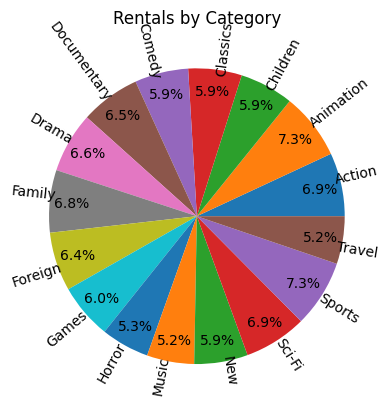

In [94]:
# Merge inventory & rental on inventory_id, find movies rented often.  Then merge with category on film_category,then category to get categories that sell well
newone = inventory.merge(rental, on="inventory_id", how="inner")
newone[
    ["inventory_id", "film_id", "store_id", "rental_id", "rental_date", "return_date"]
]
newtwo = newone.merge(film_category, on="film_id", how="inner")
newtwo = newtwo[
    [
        "inventory_id",
        "film_id",
        "store_id",
        "rental_id",
        "customer_id",
        "staff_id",
        "category_date",
        "rental_date",
        "return_date",
    ]
]
newtwo = newtwo.rename(columns={"category_date": "category_id"})

newthree = newtwo.merge(category, on="category_id")
newthree = newthree.drop(columns=["last_update"])
cat_rentals = pd.DataFrame(newthree.groupby("name")["rental_id"].count())
cat_rentals = cat_rentals.reset_index()
cat_rentals.columns = ["Category_Name", "Rental_Count"]
print(cat_rentals)
plt.pie(
    cat_rentals["Rental_Count"],
    labels=cat_rentals["Category_Name"],
    autopct="%0.1f%%",
    pctdistance=0.85,
    labeldistance=0.95,
    rotatelabels=True,
)
plt.title("Rentals by Category")
plt.show()

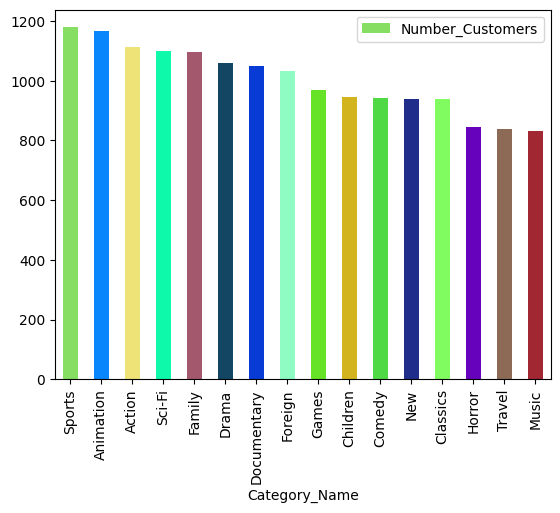

In [92]:
newthree.head()
cust_cat = pd.DataFrame(newthree.groupby("name")["customer_id"].count())
cust_cat = cust_cat.reset_index().sort_values(by="customer_id", ascending=False)
cust_cat.columns = ["Category_Name", "Number_Customers"]

from random import randint

color = []
n = len(cust_cat)
for i in range(n):
    color.append("#%06X" % randint(0, 0xFFFFFF))
cust_cat.plot.bar(x="Category_Name", y="Number_Customers",color=color)
plt.show()

In [16]:
rent_pay = payment.merge(rental,on=["customer_id","rental_id"], how="inner")
rent_pay.head()

,payment_id,customer_id,staff_id_x,rental_id,amount,payment_date,rental_date,inventory_id,return_date,staff_id_y,last_update
0,16051,269,1,98,0.99,2022-01-29 01:58:52.222594+00:00,2022-05-25 15:48:24+00:00,2970,2022-05-27 10:29:24+00:00,2,2022-02-16 02:30:53+00:00
1,16065,274,1,147,2.99,2022-01-25 12:14:16.895377+00:00,2022-05-25 23:17:50+00:00,633,2022-05-29 22:21:50+00:00,2,2022-02-16 02:30:53+00:00
2,16109,297,2,143,0.99,2022-01-28 00:49:49.128218+00:00,2022-05-25 22:45:52+00:00,847,2022-05-27 20:41:52+00:00,2,2022-02-16 02:30:53+00:00
3,16195,344,2,157,2.99,2022-01-31 05:58:51.176578+00:00,2022-05-26 00:25:21+00:00,887,2022-05-26 20:17:21+00:00,2,2022-02-16 02:30:53+00:00
4,16202,348,2,821,0.99,2022-01-26 16:52:41.359433+00:00,2022-05-29 20:31:12+00:00,3380,2022-06-04 21:49:12+00:00,1,2022-02-16 02:30:53+00:00
